In [3]:

import sys
import os

# Use cwd instead of __file__
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import joblib
from SHAP.utils import explanation
import pandas as pd
from utils.helper import split_data


dharma_comp = joblib.load('../feat_complication/dharma/dharma_comp.joblib')
dharma_imputer = joblib.load('../models/Dharma_imputer.joblib')






In [4]:
df_base = pd.read_excel('../data_curation/dataset_complications.xlsx')
feat_model = ['Nausea','Loss_of_Appetite','Peritonitis','Body_Temperature','WBC_Count','Neutrophil_Percentage','CRP','Ketones_in_Urine','Appendix_Diameter','Free_Fluids','Severity']
df_model = df_base[feat_model]

_,_, test = split_data(df_model)

In [5]:
x_test = test.drop(columns = 'Severity')
y_test = test['Severity']

x_test_imputed = dharma_imputer.transform(x_test)

2025-08-18 14:23:23,641 — INFO — Missing flag set for column: Appendix_Diameter
2025-08-18 14:23:23,650 — INFO — features list fed to the model: ['Nausea', 'Loss_of_Appetite', 'Peritonitis', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'CRP', 'Ketones_in_Urine', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Diameter_flag']


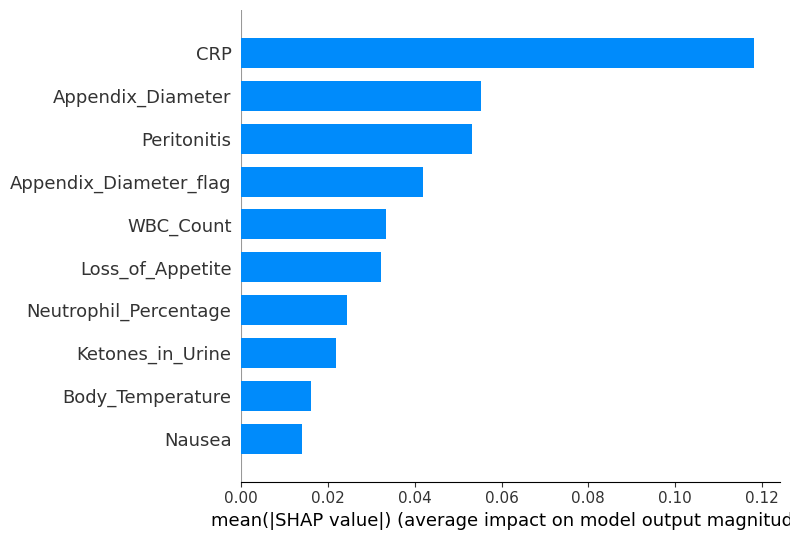

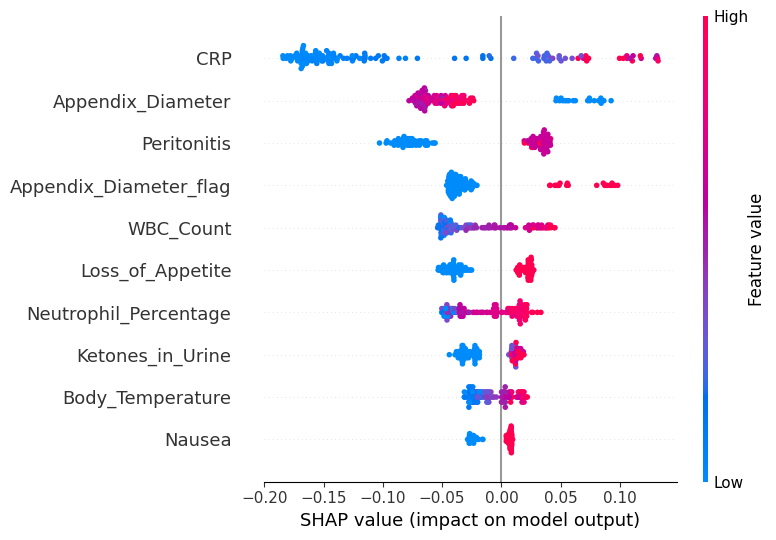

base value : 0.7341147115451598
                   Feature  Importance
6                      CRP    0.312719
8        Appendix_Diameter    0.156073
2              Peritonitis    0.108346
10  Appendix_Diameter_flag    0.104950
4                WBC_Count    0.085992
5    Neutrophil_Percentage    0.058528
1         Loss_of_Appetite    0.054309
3         Body_Temperature    0.042323
7         Ketones_in_Urine    0.040078
0                   Nausea    0.024337
9              Free_Fluids    0.012346


In [6]:
base_value, feature_imp = explanation(model = dharma_comp, x=x_test_imputed, max_display=10, class_index=1)

print (f'base value : {base_value}')
print (feature_imp)